In [1]:
import numpy as np
import h5py
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy
import cartopy.crs as ccrs
#import string

import sys
sys.path.append('../')

from plotfunctions import add_lonlat

np.seterr(all='ignore')
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
cmap1 = mpl.colors.ListedColormap(plt.get_cmap('cmo.deep_r')(np.linspace(0,.4,255)))
cmap2 = 'cmo.rain'
cmap3 = mpl.colors.ListedColormap(plt.get_cmap('cmo.gray')(np.linspace(.2,.6,255)))

x0,x1 = 4100,4400


In [3]:
vmax = 100
vmin = -10
linthresh=1
linscale=.2

vmax = 100
vmin = -10
linthresh = .3
linscale = .25


fracpos = (np.log10(vmax/linthresh)+linscale)/(np.log10(vmax/linthresh)+np.log10(-(vmin/linthresh))+2*linscale)
#print(fracpos)
nneg = np.int_((1-fracpos)*256)

colors1 = plt.get_cmap('cmo.ice_r')(np.linspace(0,.9,nneg))
colors2 = plt.cm.inferno(np.linspace(0.1, 1, 256-nneg))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [4]:
#Read observations Adusumilli

fname = '../../../data/adusumilli/bb0448974g_3_1.h5'
hf = h5py.File(fname, 'r')
xa = np.array(hf['/x'])[:,0]
ya = np.array(hf['/y'])[:,0]
melta = np.array(hf['/w_b'])


data_vars = {'melt':(['y','x'],melta)}
coords = {'x': (['x'], xa),'y': (['y'], ya)}

dsa = xr.Dataset(data_vars=data_vars,coords=coords)
dsa = dsa.isel(x=slice(2000,5000),y=slice(4500,7000))
dsa = add_lonlat(dsa)

<xarray.DataArray 'melt' ()>
array(-0.001966)
Coordinates:
    y        int32 623750
    x        int32 -1032750
    lat      float64 ...
    lon      float64 ...
[-82.50558665]
<xarray.DataArray 'melt' ()>
array(-0.001966)
Coordinates:
    y        int32 623750
    x        int32 -1032750
    lat      float64 ...
    lon      float64 ...
[-81.84801232]
<xarray.DataArray 'melt' ()>
array(-0.001966)
Coordinates:
    y        int32 623750
    x        int32 -1032750
    lat      float64 ...
    lon      float64 ...
[-80.97462647]


<Figure size 504x324 with 0 Axes>

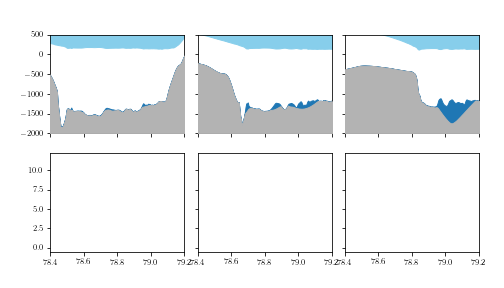

In [47]:
plt.style.use('style_paper')

#mpl.rc('figure.subplot',left=.01,right=.98,top=.95,bottom=.15,wspace=.05,hspace=.2)
#mpl.rc('text',usetex=False)
fig = plt.figure(figsize=(7,4.5))

fig,ax = plt.subplots(2,3,figsize=(7,4),sharey='row',sharex=True)

for aa,yy in enumerate([6330,6300,6260]):

    #Geometry
    ds = xr.open_dataset('../../../data/BedMachineAntarctica_2020-07-15_v02.nc')
    ds = ds.isel(x=slice(x0,x1),y=slice(yy,yy+1))
    ds = add_lonlat(ds)

    xarr = .5*(len(ds.y)-np.arange(0,len(ds.y)))

    dax = ax[0,aa]
    #dax.plot(ds.lon,ds.surface,c='.8')
    #dax.plot(ds.lon,0*ds.y,'--',c='.5',lw=.5)
    dax.plot(-ds.lat,ds.surface-ds.thickness)
    dax.fill_between(-ds.lat[0,:],-2000+0*ds.y,ds.bed[0,:],color='.7',zorder=10)
    dax.fill_between(-ds.lat[0,:],ds.bed[0,:],(ds.surface-ds.thickness)[0,:],color='tab:blue')
    dax.fill_between(-ds.lat[0,:],ds.surface[0,:],800+0*ds.y,color='skyblue')

    ds2 = xr.open_dataset(f'../../results/FRIS_1.0_linear_S134.8_T1-2.3_720.nc')
    x02 = ds.x.values[0]
    x12 = ds.x.values[-1]
    yy2 = ds.y.values[0]
    print(ds2.melt[500,500])

    ds2 = ds2.sel(x=slice(x02,x12),y=slice(yy2,yy2+1000))
    #ds2 = add_lonlat(ds2)
    

    dax = ax[1,aa]
    dax.plot(ds2.lon.values.T,ds2.melt.values.T,label='LADDIE')
    print(ds2.lon.values.T[0])
    #dax.plot(dsa.lon,dsa.melt,label='Observations')
    #dax.legend()


ax[0,0].set_xlim([78.4,79.2])
ax[0,0].set_ylim([-2000,500])

'''
for a in [0,1]:
    ax[a,0].axvline(-113.4,0,1,c='.5')
    ax[a,0].axvline(-113.1,0,1,c='k')
    ax[a,1].axvline(-113.22,0,1,c='.5')
    ax[a,1].axvline(-113.0,0,1,c='k')
    ax[a,2].axvline(-113.18,0,1,c='.5')
    ax[a,2].axvline(-113.0,0,1,c='k')

ax[0,0].axvline(-113.4,0,1,c='.5',label='Coastal Ch.')
ax[0,0].axvline(-113.1,0,1,c='k',label='Dotson Ch.')

ax[0,0].set_ylabel('Depth [m]')
ax[1,0].set_ylabel(r'Melt rate [m yr$^{-1}$')
#ax[0,0].set_xlim([-113.5,-112.3])
#ax[0,0].set_ylim([-500,100])
ax[1,0].set_ylim([0,30])
ax[1,1].set_xlabel(r"Longitude [$^{\circ}$E]")

ax[0,0].set_title('Section A')
ax[0,1].set_title('Section B')
ax[0,2].set_title('Section C')

#ax[0,0].legend()
#ax[1,0].legend()
'''
plt.savefig('../../figures/draftplot_FR_section.png',dpi=450)


/tmp/ipykernel_1769843/1821146754.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds2.x,ds2.y,ds2.melt)


ValueError: zero-size array to reduction operation minimum which has no identity

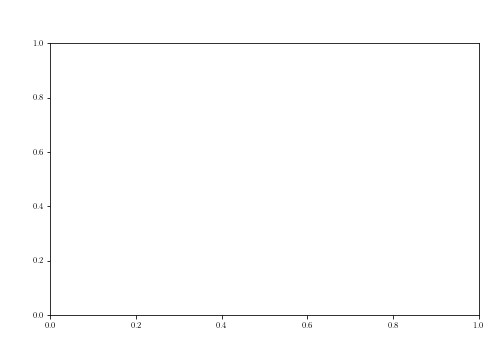

In [20]:
yy = 6300
ds = xr.open_dataset('../../../data/BedMachineAntarctica_2020-07-15_v02.nc')
ds = ds.isel(x=slice(x0,x1),y=slice(yy,yy+1))

x02 = ds.x.values[0]
x12 = ds.x.values[-1]
yy2 = ds.y.values[0]
ds2 = xr.open_dataset(f'../../results/FRIS_1.0_linear_S134.8_T1-2.3_720.nc')
ds2 = ds2.sel(x=slice(x02,x12),y=slice(yy2,yy2))
plt.pcolormesh(ds2.x,ds2.y,ds2.melt)

/tmp/ipykernel_1769843/3256299123.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds2.x,ds2.y,ds2.melt)


(1, 150)


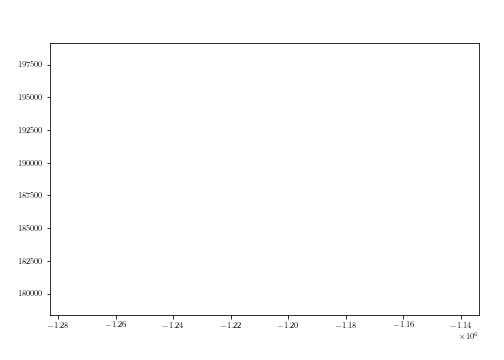

In [46]:
ds2 = xr.open_dataset(f'../../results/FRIS_1.0_linear_S134.8_T1-2.3_720.nc')
#ds2 = ds2.sel(x=slice(-1283000,-1133500),y=slice(188000,188000+1000))
ds2 = ds2.sel(x=slice(-1283000,-1133500),y=slice(188000,188000+1000))
plt.pcolormesh(ds2.x,ds2.y,ds2.melt)
print(ds2.melt.shape)

<xarray.DataArray 'x' ()>
array(-1283000, dtype=int32)
Coordinates:
    x        int32 -1283000
Attributes:
    long_name:      Cartesian x-coordinate
    standard_name:  projection_x_coordinate
    units:          meter <xarray.DataArray 'x' ()>
array(-1133500, dtype=int32)
Coordinates:
    x        int32 -1133500
Attributes:
    long_name:      Cartesian x-coordinate
    standard_name:  projection_x_coordinate
    units:          meter <xarray.DataArray 'y' ()>
array(188000, dtype=int32)
Coordinates:
    y        int32 188000
Attributes:
    long_name:      Cartesian y-coordinate
    standard_name:  projection_y_coordinate
    units:          meter


/tmp/ipykernel_1769843/684731836.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.x,ds.y,ds.surface-ds.thickness)


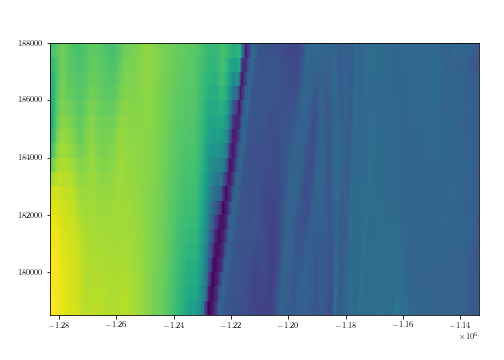

In [32]:
ds = xr.open_dataset('../../../data/BedMachineAntarctica_2020-07-15_v02.nc')
ds = ds.isel(x=slice(x0,x1),y=slice(yy-10,yy+10))
ds = add_lonlat(ds)
print(ds.x[0],ds.x[-1],ds.y[0])
plt.pcolormesh(ds.x,ds.y,ds.surface-ds.thickness)